# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

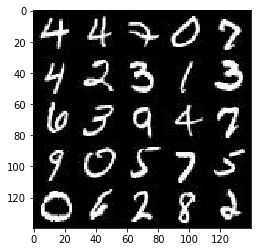

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

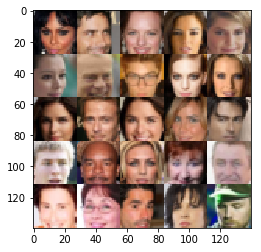

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
   
    real_input_images = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='real_data')
    z_data = tf.placeholder(tf.float32,(None,z_dim),name='z_data')
    lr = tf.placeholder(tf.float32,name='learning_rate')
    return real_input_images,z_data,lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [292]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    dropout =0.8
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 32, 4, strides=2, padding='valid')
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1,dropout)
        #print('x1',x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2,dropout)
        #print('x2',x2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(x2, 256, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3,dropout)
        #print('x3',x3)
        # 4x4x256
        x4 = tf.layers.conv2d(x3, 512, 4, strides=2, padding='Valid')
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha * x4, x4)
        #x4 = tf.nn.dropout(x4,dropout)
        #print('x4',x4)
        x5 = tf.layers.conv2d(x3, 512, 4, strides=2, padding='same')
        x5 = tf.layers.batch_normalization(x5, training=True)
        x5 = tf.maximum(alpha * x5, x5)      
    
    # Flatten it
        flat = tf.reshape(x5, (-1, 2*2*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [293]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    dropout = 0.8
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.reshape(x1, (-1, 2, 2, 512)) 
        x1 = tf.nn.dropout(x1,dropout)
        # 3x3x512 now
        #print('x1',x1)
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2,dropout)
        # 7x7x256 now
        #print('x2',x2)
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3,dropout)
        # 14x14x128 now
        #print('x3',x3)
        x4 = tf.layers.conv2d_transpose(x3, 64, 4, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        #print('x4',x4)
        x5 = tf.layers.conv2d_transpose(x4, 32, 4, strides=1, padding='same')
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        #print('x5',x5)
        # Output layer
        logits = tf.layers.conv2d_transpose(x5, out_channel_dim, 5, strides=1, padding='valid')
        # 28x28x3 now
        #print('logits',logits)
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [294]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [233]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
     # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [234]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [295]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #tf.reset_default_graph()
    #print(data_shape)
    real_data,z_data,lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss,g_loss = model_loss(real_data, z_data, data_shape[3])
    d_train_opt,g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images= batch_images*2
                # TODO: Train Model
                #print(batch_images)
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_train_opt, feed_dict={real_data: batch_images, z_data: batch_z})
                _ = sess.run(g_train_opt, feed_dict={z_data: batch_z, real_data: batch_images})
                _ = sess.run(g_train_opt, feed_dict={z_data: batch_z, real_data: batch_images})
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({z_data: batch_z, real_data: batch_images})
                    train_loss_g = g_loss.eval({z_data: batch_z})
        
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
        
                    if steps % 100 == 0:
                        show_generator_output(sess,12,z_data,data_shape[3],data_image_mode)
        

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6971... Generator Loss: 3.3294
Epoch 1/2... Discriminator Loss: 1.3567... Generator Loss: 0.6820
Epoch 1/2... Discriminator Loss: 4.1393... Generator Loss: 0.0482
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 0.8123
Epoch 1/2... Discriminator Loss: 0.5883... Generator Loss: 1.8888
Epoch 1/2... Discriminator Loss: 0.7896... Generator Loss: 1.5500
Epoch 1/2... Discriminator Loss: 1.0884... Generator Loss: 2.4228
Epoch 1/2... Discriminator Loss: 1.5529... Generator Loss: 1.1715
Epoch 1/2... Discriminator Loss: 1.3274... Generator Loss: 0.6860
Epoch 1/2... Discriminator Loss: 1.1616... Generator Loss: 0.6007


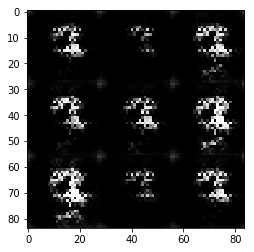

Epoch 1/2... Discriminator Loss: 0.8090... Generator Loss: 1.3321
Epoch 1/2... Discriminator Loss: 1.0154... Generator Loss: 1.1316
Epoch 1/2... Discriminator Loss: 0.6400... Generator Loss: 1.4883
Epoch 1/2... Discriminator Loss: 0.9398... Generator Loss: 1.7868
Epoch 1/2... Discriminator Loss: 0.7440... Generator Loss: 1.1077
Epoch 1/2... Discriminator Loss: 2.0292... Generator Loss: 0.3130
Epoch 1/2... Discriminator Loss: 1.1027... Generator Loss: 0.7979
Epoch 1/2... Discriminator Loss: 1.0981... Generator Loss: 0.8796
Epoch 1/2... Discriminator Loss: 1.0377... Generator Loss: 0.9661
Epoch 1/2... Discriminator Loss: 0.8586... Generator Loss: 1.0683


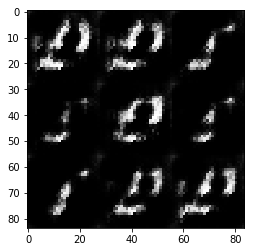

Epoch 1/2... Discriminator Loss: 0.8493... Generator Loss: 1.1134
Epoch 1/2... Discriminator Loss: 1.0279... Generator Loss: 1.1732
Epoch 1/2... Discriminator Loss: 1.4810... Generator Loss: 0.6710
Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 0.6885
Epoch 1/2... Discriminator Loss: 1.4371... Generator Loss: 0.6422
Epoch 1/2... Discriminator Loss: 1.3811... Generator Loss: 0.5780
Epoch 1/2... Discriminator Loss: 1.5824... Generator Loss: 0.7470
Epoch 1/2... Discriminator Loss: 1.6461... Generator Loss: 0.7374
Epoch 1/2... Discriminator Loss: 1.4640... Generator Loss: 0.6481
Epoch 1/2... Discriminator Loss: 1.2307... Generator Loss: 0.6256


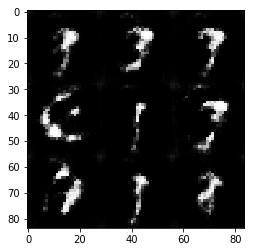

Epoch 1/2... Discriminator Loss: 2.0729... Generator Loss: 0.4692
Epoch 1/2... Discriminator Loss: 1.3553... Generator Loss: 0.8500
Epoch 1/2... Discriminator Loss: 1.3977... Generator Loss: 0.6391
Epoch 1/2... Discriminator Loss: 1.5829... Generator Loss: 0.5254
Epoch 1/2... Discriminator Loss: 1.4809... Generator Loss: 0.5322
Epoch 1/2... Discriminator Loss: 1.6122... Generator Loss: 0.5693
Epoch 1/2... Discriminator Loss: 1.3235... Generator Loss: 0.7564
Epoch 1/2... Discriminator Loss: 1.3760... Generator Loss: 0.7325
Epoch 1/2... Discriminator Loss: 1.5060... Generator Loss: 0.6723
Epoch 1/2... Discriminator Loss: 1.3720... Generator Loss: 0.6941


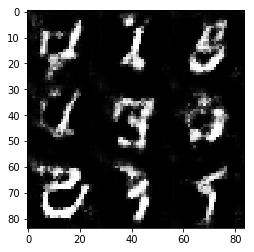

Epoch 1/2... Discriminator Loss: 1.2940... Generator Loss: 0.6258
Epoch 1/2... Discriminator Loss: 1.4317... Generator Loss: 0.6277
Epoch 1/2... Discriminator Loss: 1.2857... Generator Loss: 0.6868
Epoch 1/2... Discriminator Loss: 1.3484... Generator Loss: 0.7225
Epoch 1/2... Discriminator Loss: 1.3528... Generator Loss: 0.7142
Epoch 1/2... Discriminator Loss: 1.5464... Generator Loss: 0.5625
Epoch 1/2... Discriminator Loss: 1.3319... Generator Loss: 0.7185
Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 0.7194
Epoch 1/2... Discriminator Loss: 1.3990... Generator Loss: 0.6730
Epoch 1/2... Discriminator Loss: 1.3548... Generator Loss: 0.6664


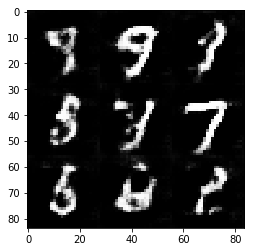

Epoch 1/2... Discriminator Loss: 1.3755... Generator Loss: 0.5240
Epoch 1/2... Discriminator Loss: 1.3135... Generator Loss: 0.7223
Epoch 1/2... Discriminator Loss: 1.3949... Generator Loss: 0.6226
Epoch 1/2... Discriminator Loss: 1.5272... Generator Loss: 0.6291
Epoch 1/2... Discriminator Loss: 1.3257... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 1.2335... Generator Loss: 0.7288
Epoch 1/2... Discriminator Loss: 1.4708... Generator Loss: 0.6393
Epoch 1/2... Discriminator Loss: 1.4925... Generator Loss: 0.5689
Epoch 1/2... Discriminator Loss: 1.6544... Generator Loss: 0.3860
Epoch 1/2... Discriminator Loss: 1.4747... Generator Loss: 0.6537


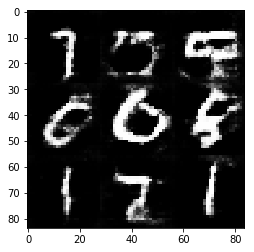

Epoch 1/2... Discriminator Loss: 1.2148... Generator Loss: 0.7613
Epoch 1/2... Discriminator Loss: 1.3813... Generator Loss: 0.8064
Epoch 1/2... Discriminator Loss: 1.5036... Generator Loss: 0.4696
Epoch 1/2... Discriminator Loss: 1.3344... Generator Loss: 0.6185
Epoch 1/2... Discriminator Loss: 1.4928... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.4061... Generator Loss: 0.8480
Epoch 1/2... Discriminator Loss: 1.4286... Generator Loss: 0.4515
Epoch 1/2... Discriminator Loss: 1.3103... Generator Loss: 0.6347
Epoch 1/2... Discriminator Loss: 1.3031... Generator Loss: 0.7015
Epoch 1/2... Discriminator Loss: 1.2703... Generator Loss: 0.5830


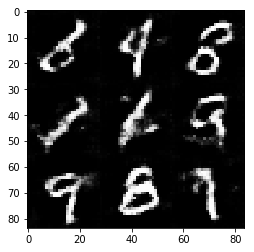

Epoch 1/2... Discriminator Loss: 1.4680... Generator Loss: 0.4618
Epoch 1/2... Discriminator Loss: 1.3333... Generator Loss: 0.5965
Epoch 1/2... Discriminator Loss: 1.2787... Generator Loss: 0.9820
Epoch 1/2... Discriminator Loss: 1.3224... Generator Loss: 0.6699
Epoch 1/2... Discriminator Loss: 1.3714... Generator Loss: 0.6019
Epoch 1/2... Discriminator Loss: 1.4664... Generator Loss: 0.6584
Epoch 1/2... Discriminator Loss: 1.3120... Generator Loss: 0.6940
Epoch 1/2... Discriminator Loss: 1.2698... Generator Loss: 0.5059
Epoch 1/2... Discriminator Loss: 1.4811... Generator Loss: 0.6157
Epoch 1/2... Discriminator Loss: 1.3566... Generator Loss: 0.6916


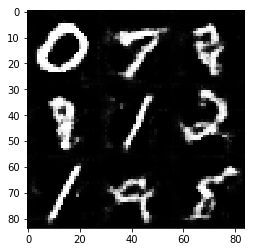

Epoch 1/2... Discriminator Loss: 1.3328... Generator Loss: 0.6499
Epoch 1/2... Discriminator Loss: 1.4515... Generator Loss: 0.6388
Epoch 1/2... Discriminator Loss: 1.4306... Generator Loss: 0.5742
Epoch 1/2... Discriminator Loss: 1.4157... Generator Loss: 0.4479
Epoch 1/2... Discriminator Loss: 1.4919... Generator Loss: 0.5284
Epoch 1/2... Discriminator Loss: 1.3450... Generator Loss: 0.6983
Epoch 1/2... Discriminator Loss: 1.3980... Generator Loss: 0.5452
Epoch 1/2... Discriminator Loss: 1.2323... Generator Loss: 0.7154
Epoch 1/2... Discriminator Loss: 1.3341... Generator Loss: 0.6877
Epoch 1/2... Discriminator Loss: 1.2937... Generator Loss: 0.6077


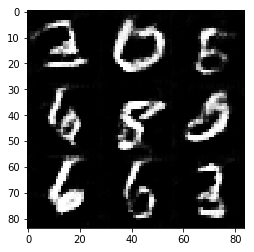

Epoch 1/2... Discriminator Loss: 1.4029... Generator Loss: 0.7411
Epoch 1/2... Discriminator Loss: 1.4282... Generator Loss: 0.4913
Epoch 1/2... Discriminator Loss: 1.3566... Generator Loss: 0.8328
Epoch 1/2... Discriminator Loss: 1.4416... Generator Loss: 0.6808
Epoch 1/2... Discriminator Loss: 1.3622... Generator Loss: 0.7033
Epoch 1/2... Discriminator Loss: 1.4813... Generator Loss: 0.6035
Epoch 1/2... Discriminator Loss: 1.3801... Generator Loss: 0.4632
Epoch 1/2... Discriminator Loss: 1.2810... Generator Loss: 0.8381
Epoch 1/2... Discriminator Loss: 1.4412... Generator Loss: 0.6461
Epoch 1/2... Discriminator Loss: 1.3218... Generator Loss: 0.6225


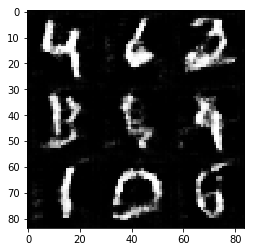

Epoch 1/2... Discriminator Loss: 1.4423... Generator Loss: 0.6021
Epoch 1/2... Discriminator Loss: 1.2356... Generator Loss: 0.7302
Epoch 1/2... Discriminator Loss: 1.3028... Generator Loss: 0.6158
Epoch 1/2... Discriminator Loss: 1.4292... Generator Loss: 0.6424
Epoch 1/2... Discriminator Loss: 1.4169... Generator Loss: 0.5206
Epoch 1/2... Discriminator Loss: 1.3831... Generator Loss: 0.7004
Epoch 1/2... Discriminator Loss: 1.5602... Generator Loss: 0.5784
Epoch 1/2... Discriminator Loss: 1.3749... Generator Loss: 0.6228
Epoch 1/2... Discriminator Loss: 1.5662... Generator Loss: 0.5539
Epoch 1/2... Discriminator Loss: 1.3829... Generator Loss: 0.7062


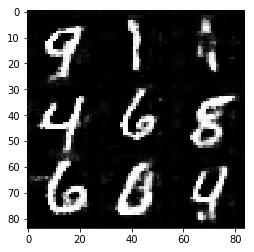

Epoch 1/2... Discriminator Loss: 1.3948... Generator Loss: 0.6428
Epoch 1/2... Discriminator Loss: 1.4348... Generator Loss: 0.5279
Epoch 1/2... Discriminator Loss: 1.4272... Generator Loss: 0.6841
Epoch 1/2... Discriminator Loss: 1.3955... Generator Loss: 0.6354
Epoch 1/2... Discriminator Loss: 1.4934... Generator Loss: 0.6182
Epoch 1/2... Discriminator Loss: 1.5978... Generator Loss: 0.6740
Epoch 1/2... Discriminator Loss: 1.3551... Generator Loss: 0.5935
Epoch 1/2... Discriminator Loss: 1.2465... Generator Loss: 0.6752
Epoch 1/2... Discriminator Loss: 1.3337... Generator Loss: 0.6460
Epoch 1/2... Discriminator Loss: 1.4476... Generator Loss: 0.5848


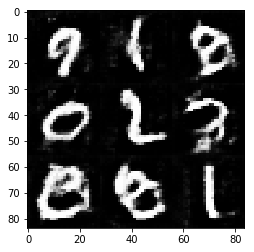

Epoch 1/2... Discriminator Loss: 1.3266... Generator Loss: 0.7055
Epoch 1/2... Discriminator Loss: 1.2897... Generator Loss: 0.4582
Epoch 1/2... Discriminator Loss: 1.3270... Generator Loss: 0.6822
Epoch 1/2... Discriminator Loss: 1.4807... Generator Loss: 0.5719
Epoch 1/2... Discriminator Loss: 1.4854... Generator Loss: 0.6688
Epoch 1/2... Discriminator Loss: 1.4896... Generator Loss: 0.5728
Epoch 1/2... Discriminator Loss: 1.4149... Generator Loss: 0.6082
Epoch 1/2... Discriminator Loss: 1.3886... Generator Loss: 0.6345
Epoch 1/2... Discriminator Loss: 1.3591... Generator Loss: 0.7977
Epoch 1/2... Discriminator Loss: 1.4960... Generator Loss: 0.7007


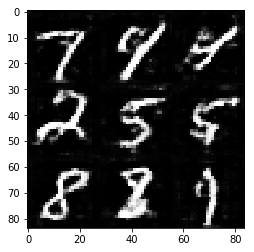

Epoch 1/2... Discriminator Loss: 1.3167... Generator Loss: 0.6567
Epoch 1/2... Discriminator Loss: 1.4140... Generator Loss: 0.6952
Epoch 1/2... Discriminator Loss: 1.1621... Generator Loss: 0.7648
Epoch 1/2... Discriminator Loss: 1.4590... Generator Loss: 0.5717
Epoch 1/2... Discriminator Loss: 1.4166... Generator Loss: 0.5818
Epoch 1/2... Discriminator Loss: 1.2784... Generator Loss: 0.5681
Epoch 1/2... Discriminator Loss: 1.4534... Generator Loss: 0.7666
Epoch 1/2... Discriminator Loss: 1.4197... Generator Loss: 0.6277
Epoch 1/2... Discriminator Loss: 1.4022... Generator Loss: 0.4667
Epoch 1/2... Discriminator Loss: 1.3383... Generator Loss: 0.7297


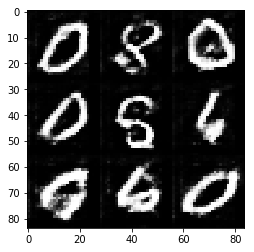

Epoch 1/2... Discriminator Loss: 1.3933... Generator Loss: 0.5823
Epoch 1/2... Discriminator Loss: 1.3874... Generator Loss: 0.6044
Epoch 1/2... Discriminator Loss: 1.4475... Generator Loss: 0.6724
Epoch 1/2... Discriminator Loss: 1.3446... Generator Loss: 0.8016
Epoch 1/2... Discriminator Loss: 1.5101... Generator Loss: 0.6512
Epoch 1/2... Discriminator Loss: 1.3148... Generator Loss: 0.6969
Epoch 1/2... Discriminator Loss: 1.3638... Generator Loss: 0.5931
Epoch 1/2... Discriminator Loss: 1.3429... Generator Loss: 0.6174
Epoch 1/2... Discriminator Loss: 1.2926... Generator Loss: 0.8804
Epoch 1/2... Discriminator Loss: 1.3345... Generator Loss: 0.7813


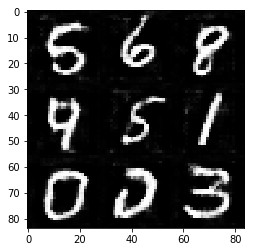

Epoch 1/2... Discriminator Loss: 1.4403... Generator Loss: 0.6167
Epoch 1/2... Discriminator Loss: 1.3981... Generator Loss: 0.6215
Epoch 1/2... Discriminator Loss: 1.4405... Generator Loss: 0.6335
Epoch 1/2... Discriminator Loss: 1.3709... Generator Loss: 0.7181
Epoch 1/2... Discriminator Loss: 1.4565... Generator Loss: 0.7422
Epoch 1/2... Discriminator Loss: 1.6233... Generator Loss: 0.4775
Epoch 1/2... Discriminator Loss: 1.5001... Generator Loss: 0.6802
Epoch 1/2... Discriminator Loss: 1.3214... Generator Loss: 0.8639
Epoch 1/2... Discriminator Loss: 1.2866... Generator Loss: 0.6404
Epoch 1/2... Discriminator Loss: 1.3476... Generator Loss: 0.6206


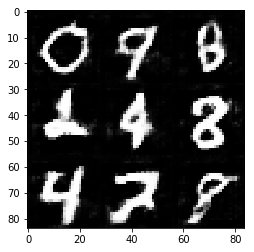

Epoch 1/2... Discriminator Loss: 1.4278... Generator Loss: 0.6977
Epoch 1/2... Discriminator Loss: 1.3433... Generator Loss: 0.6487
Epoch 1/2... Discriminator Loss: 1.5050... Generator Loss: 0.6848
Epoch 1/2... Discriminator Loss: 1.3029... Generator Loss: 0.6634
Epoch 1/2... Discriminator Loss: 1.3744... Generator Loss: 0.5589
Epoch 1/2... Discriminator Loss: 1.4914... Generator Loss: 0.5218
Epoch 1/2... Discriminator Loss: 1.4141... Generator Loss: 0.6232
Epoch 1/2... Discriminator Loss: 1.2866... Generator Loss: 0.6694
Epoch 1/2... Discriminator Loss: 1.3059... Generator Loss: 0.6582
Epoch 1/2... Discriminator Loss: 1.2443... Generator Loss: 0.7552


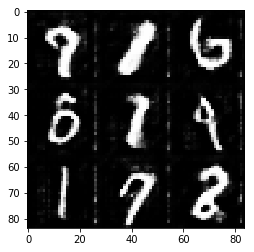

Epoch 1/2... Discriminator Loss: 1.3917... Generator Loss: 0.5947
Epoch 1/2... Discriminator Loss: 1.4217... Generator Loss: 0.7159
Epoch 1/2... Discriminator Loss: 1.4524... Generator Loss: 0.6113
Epoch 1/2... Discriminator Loss: 1.2895... Generator Loss: 0.5641
Epoch 1/2... Discriminator Loss: 1.4871... Generator Loss: 0.5083
Epoch 1/2... Discriminator Loss: 1.3178... Generator Loss: 0.7009
Epoch 1/2... Discriminator Loss: 1.3013... Generator Loss: 0.6216
Epoch 1/2... Discriminator Loss: 1.3135... Generator Loss: 0.5230
Epoch 1/2... Discriminator Loss: 1.3959... Generator Loss: 0.5752
Epoch 1/2... Discriminator Loss: 1.3691... Generator Loss: 0.7941


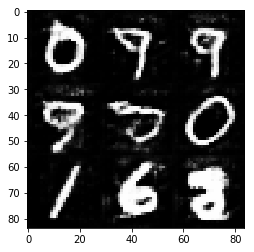

Epoch 1/2... Discriminator Loss: 1.4413... Generator Loss: 0.6886
Epoch 1/2... Discriminator Loss: 1.5306... Generator Loss: 0.6395
Epoch 1/2... Discriminator Loss: 1.5159... Generator Loss: 0.5541
Epoch 1/2... Discriminator Loss: 1.2193... Generator Loss: 0.6417
Epoch 1/2... Discriminator Loss: 1.3279... Generator Loss: 0.7401
Epoch 1/2... Discriminator Loss: 1.3885... Generator Loss: 0.6633
Epoch 1/2... Discriminator Loss: 1.3111... Generator Loss: 0.6799
Epoch 2/2... Discriminator Loss: 1.2693... Generator Loss: 0.7311
Epoch 2/2... Discriminator Loss: 1.2683... Generator Loss: 0.6270
Epoch 2/2... Discriminator Loss: 1.3892... Generator Loss: 0.6361


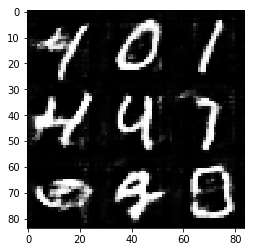

Epoch 2/2... Discriminator Loss: 1.2514... Generator Loss: 0.5833
Epoch 2/2... Discriminator Loss: 1.2812... Generator Loss: 0.5547
Epoch 2/2... Discriminator Loss: 1.2930... Generator Loss: 0.7330
Epoch 2/2... Discriminator Loss: 1.2303... Generator Loss: 0.6398
Epoch 2/2... Discriminator Loss: 1.3228... Generator Loss: 0.7405
Epoch 2/2... Discriminator Loss: 1.5129... Generator Loss: 0.5500
Epoch 2/2... Discriminator Loss: 1.3866... Generator Loss: 0.7364
Epoch 2/2... Discriminator Loss: 1.3140... Generator Loss: 0.7385
Epoch 2/2... Discriminator Loss: 1.5183... Generator Loss: 0.5121
Epoch 2/2... Discriminator Loss: 1.2931... Generator Loss: 0.7510


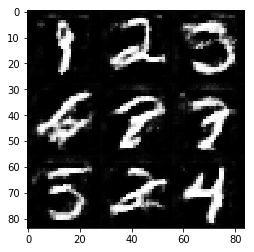

Epoch 2/2... Discriminator Loss: 1.1845... Generator Loss: 0.7706
Epoch 2/2... Discriminator Loss: 1.3305... Generator Loss: 0.6993
Epoch 2/2... Discriminator Loss: 1.3942... Generator Loss: 0.6507
Epoch 2/2... Discriminator Loss: 1.2049... Generator Loss: 0.7244
Epoch 2/2... Discriminator Loss: 1.2392... Generator Loss: 0.7980
Epoch 2/2... Discriminator Loss: 1.3033... Generator Loss: 0.6114
Epoch 2/2... Discriminator Loss: 1.4135... Generator Loss: 0.5605
Epoch 2/2... Discriminator Loss: 1.3144... Generator Loss: 0.7500
Epoch 2/2... Discriminator Loss: 1.4102... Generator Loss: 0.8707
Epoch 2/2... Discriminator Loss: 1.2970... Generator Loss: 0.7074


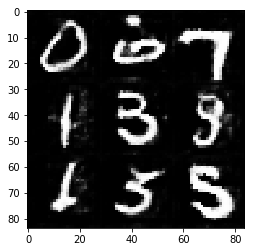

Epoch 2/2... Discriminator Loss: 1.4440... Generator Loss: 0.7056
Epoch 2/2... Discriminator Loss: 1.3550... Generator Loss: 0.7628
Epoch 2/2... Discriminator Loss: 1.2892... Generator Loss: 0.6723
Epoch 2/2... Discriminator Loss: 1.4932... Generator Loss: 0.4880
Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.6451
Epoch 2/2... Discriminator Loss: 1.4756... Generator Loss: 0.6016
Epoch 2/2... Discriminator Loss: 1.3646... Generator Loss: 0.5348
Epoch 2/2... Discriminator Loss: 1.3063... Generator Loss: 0.7699
Epoch 2/2... Discriminator Loss: 1.4882... Generator Loss: 0.5271
Epoch 2/2... Discriminator Loss: 1.2703... Generator Loss: 0.6916


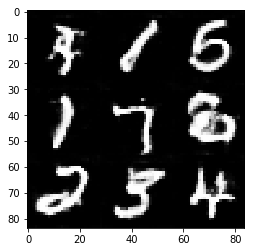

Epoch 2/2... Discriminator Loss: 1.3028... Generator Loss: 0.5026
Epoch 2/2... Discriminator Loss: 1.3232... Generator Loss: 0.7193
Epoch 2/2... Discriminator Loss: 1.1591... Generator Loss: 0.8029
Epoch 2/2... Discriminator Loss: 1.3092... Generator Loss: 0.7083
Epoch 2/2... Discriminator Loss: 1.2578... Generator Loss: 0.6647
Epoch 2/2... Discriminator Loss: 1.2752... Generator Loss: 0.6726
Epoch 2/2... Discriminator Loss: 1.3389... Generator Loss: 0.6958
Epoch 2/2... Discriminator Loss: 1.2389... Generator Loss: 0.6247
Epoch 2/2... Discriminator Loss: 1.2497... Generator Loss: 0.5716
Epoch 2/2... Discriminator Loss: 1.3377... Generator Loss: 0.6642


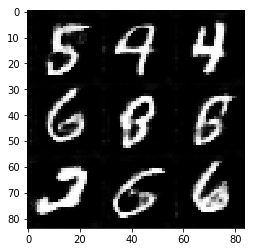

Epoch 2/2... Discriminator Loss: 1.3240... Generator Loss: 0.7072
Epoch 2/2... Discriminator Loss: 1.5994... Generator Loss: 0.5838
Epoch 2/2... Discriminator Loss: 1.3751... Generator Loss: 0.5068
Epoch 2/2... Discriminator Loss: 1.4053... Generator Loss: 0.6832
Epoch 2/2... Discriminator Loss: 1.1952... Generator Loss: 0.7716
Epoch 2/2... Discriminator Loss: 1.2741... Generator Loss: 0.6126
Epoch 2/2... Discriminator Loss: 1.3629... Generator Loss: 0.7183
Epoch 2/2... Discriminator Loss: 1.1857... Generator Loss: 0.8650
Epoch 2/2... Discriminator Loss: 1.3707... Generator Loss: 0.5974
Epoch 2/2... Discriminator Loss: 1.3507... Generator Loss: 0.6812


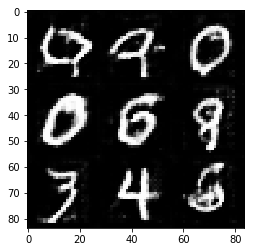

Epoch 2/2... Discriminator Loss: 1.5115... Generator Loss: 0.4512
Epoch 2/2... Discriminator Loss: 1.2551... Generator Loss: 0.6860
Epoch 2/2... Discriminator Loss: 1.1536... Generator Loss: 0.8197
Epoch 2/2... Discriminator Loss: 1.4586... Generator Loss: 0.7279
Epoch 2/2... Discriminator Loss: 1.3093... Generator Loss: 0.7072
Epoch 2/2... Discriminator Loss: 1.3061... Generator Loss: 0.6203
Epoch 2/2... Discriminator Loss: 1.6197... Generator Loss: 0.5518
Epoch 2/2... Discriminator Loss: 1.2633... Generator Loss: 0.9222
Epoch 2/2... Discriminator Loss: 1.2118... Generator Loss: 0.7611
Epoch 2/2... Discriminator Loss: 1.4050... Generator Loss: 0.6858


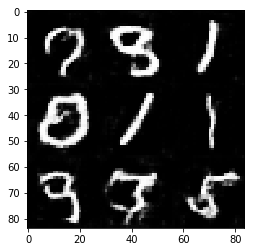

Epoch 2/2... Discriminator Loss: 1.3388... Generator Loss: 0.8616
Epoch 2/2... Discriminator Loss: 1.3383... Generator Loss: 0.7423
Epoch 2/2... Discriminator Loss: 1.4752... Generator Loss: 0.4978
Epoch 2/2... Discriminator Loss: 1.2620... Generator Loss: 0.7208
Epoch 2/2... Discriminator Loss: 1.2989... Generator Loss: 0.6398
Epoch 2/2... Discriminator Loss: 1.3804... Generator Loss: 0.7614
Epoch 2/2... Discriminator Loss: 1.3129... Generator Loss: 0.7776
Epoch 2/2... Discriminator Loss: 1.0699... Generator Loss: 0.6983
Epoch 2/2... Discriminator Loss: 1.3183... Generator Loss: 0.7109
Epoch 2/2... Discriminator Loss: 1.1640... Generator Loss: 0.6950


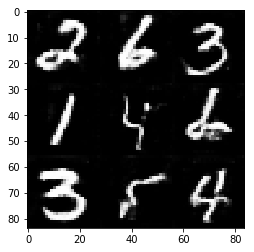

Epoch 2/2... Discriminator Loss: 1.2799... Generator Loss: 0.6259
Epoch 2/2... Discriminator Loss: 1.3834... Generator Loss: 0.6860
Epoch 2/2... Discriminator Loss: 1.2182... Generator Loss: 0.7388
Epoch 2/2... Discriminator Loss: 1.4758... Generator Loss: 0.5322
Epoch 2/2... Discriminator Loss: 1.1150... Generator Loss: 0.6870
Epoch 2/2... Discriminator Loss: 1.1780... Generator Loss: 0.7425
Epoch 2/2... Discriminator Loss: 1.3931... Generator Loss: 0.5539
Epoch 2/2... Discriminator Loss: 1.2812... Generator Loss: 0.7159
Epoch 2/2... Discriminator Loss: 1.3730... Generator Loss: 0.5366
Epoch 2/2... Discriminator Loss: 1.3578... Generator Loss: 0.5537


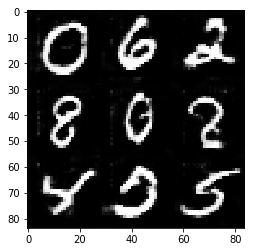

Epoch 2/2... Discriminator Loss: 1.4160... Generator Loss: 0.6465
Epoch 2/2... Discriminator Loss: 1.2114... Generator Loss: 0.7864
Epoch 2/2... Discriminator Loss: 1.3412... Generator Loss: 0.6395
Epoch 2/2... Discriminator Loss: 1.3693... Generator Loss: 0.5779
Epoch 2/2... Discriminator Loss: 1.4200... Generator Loss: 0.8876
Epoch 2/2... Discriminator Loss: 1.1976... Generator Loss: 0.7480
Epoch 2/2... Discriminator Loss: 1.3670... Generator Loss: 0.6681
Epoch 2/2... Discriminator Loss: 1.2277... Generator Loss: 0.7852
Epoch 2/2... Discriminator Loss: 1.3434... Generator Loss: 0.6036
Epoch 2/2... Discriminator Loss: 1.4733... Generator Loss: 0.7149


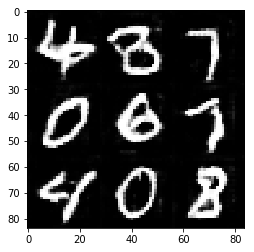

Epoch 2/2... Discriminator Loss: 1.1716... Generator Loss: 0.8579
Epoch 2/2... Discriminator Loss: 1.4394... Generator Loss: 0.5631
Epoch 2/2... Discriminator Loss: 1.2148... Generator Loss: 0.6353
Epoch 2/2... Discriminator Loss: 1.3122... Generator Loss: 0.4735
Epoch 2/2... Discriminator Loss: 1.4026... Generator Loss: 0.6151
Epoch 2/2... Discriminator Loss: 1.4356... Generator Loss: 0.4915
Epoch 2/2... Discriminator Loss: 1.2001... Generator Loss: 0.7274
Epoch 2/2... Discriminator Loss: 1.4381... Generator Loss: 0.5651
Epoch 2/2... Discriminator Loss: 1.4014... Generator Loss: 0.6883
Epoch 2/2... Discriminator Loss: 1.3189... Generator Loss: 0.8340


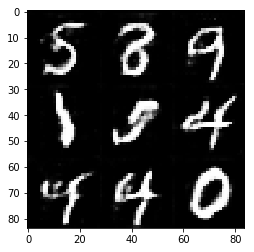

Epoch 2/2... Discriminator Loss: 1.4463... Generator Loss: 0.4933
Epoch 2/2... Discriminator Loss: 1.2358... Generator Loss: 0.6189
Epoch 2/2... Discriminator Loss: 1.1240... Generator Loss: 0.8738
Epoch 2/2... Discriminator Loss: 1.3527... Generator Loss: 0.6356
Epoch 2/2... Discriminator Loss: 1.3423... Generator Loss: 0.5738
Epoch 2/2... Discriminator Loss: 1.1215... Generator Loss: 0.9747
Epoch 2/2... Discriminator Loss: 1.4304... Generator Loss: 0.5295
Epoch 2/2... Discriminator Loss: 1.1099... Generator Loss: 0.7651
Epoch 2/2... Discriminator Loss: 1.2542... Generator Loss: 0.6706
Epoch 2/2... Discriminator Loss: 1.4119... Generator Loss: 0.6858


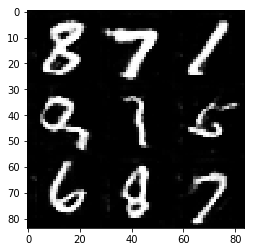

Epoch 2/2... Discriminator Loss: 1.3324... Generator Loss: 0.5949
Epoch 2/2... Discriminator Loss: 1.2571... Generator Loss: 0.7857
Epoch 2/2... Discriminator Loss: 1.4207... Generator Loss: 0.5858
Epoch 2/2... Discriminator Loss: 1.2056... Generator Loss: 0.7906
Epoch 2/2... Discriminator Loss: 1.4039... Generator Loss: 0.6399
Epoch 2/2... Discriminator Loss: 1.2432... Generator Loss: 0.6420
Epoch 2/2... Discriminator Loss: 1.4527... Generator Loss: 0.5978
Epoch 2/2... Discriminator Loss: 1.2356... Generator Loss: 0.6331
Epoch 2/2... Discriminator Loss: 1.1085... Generator Loss: 0.7413
Epoch 2/2... Discriminator Loss: 1.2913... Generator Loss: 0.5992


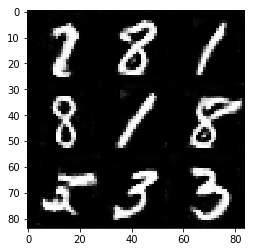

Epoch 2/2... Discriminator Loss: 1.5299... Generator Loss: 0.6386
Epoch 2/2... Discriminator Loss: 1.3247... Generator Loss: 0.5684
Epoch 2/2... Discriminator Loss: 1.2606... Generator Loss: 0.7457
Epoch 2/2... Discriminator Loss: 1.3782... Generator Loss: 0.6629
Epoch 2/2... Discriminator Loss: 1.2822... Generator Loss: 0.6526
Epoch 2/2... Discriminator Loss: 1.3517... Generator Loss: 0.6849
Epoch 2/2... Discriminator Loss: 1.4502... Generator Loss: 0.5920
Epoch 2/2... Discriminator Loss: 1.2938... Generator Loss: 0.5933
Epoch 2/2... Discriminator Loss: 1.4002... Generator Loss: 0.4912
Epoch 2/2... Discriminator Loss: 1.2956... Generator Loss: 0.7531


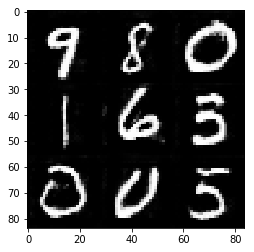

Epoch 2/2... Discriminator Loss: 1.3338... Generator Loss: 0.5558
Epoch 2/2... Discriminator Loss: 1.3265... Generator Loss: 0.9672
Epoch 2/2... Discriminator Loss: 1.2423... Generator Loss: 0.8257
Epoch 2/2... Discriminator Loss: 1.2705... Generator Loss: 0.7900
Epoch 2/2... Discriminator Loss: 1.5268... Generator Loss: 0.4053
Epoch 2/2... Discriminator Loss: 1.2123... Generator Loss: 0.7249
Epoch 2/2... Discriminator Loss: 1.4267... Generator Loss: 0.5731
Epoch 2/2... Discriminator Loss: 1.3100... Generator Loss: 0.7133
Epoch 2/2... Discriminator Loss: 1.3957... Generator Loss: 0.4910
Epoch 2/2... Discriminator Loss: 1.5401... Generator Loss: 0.6916


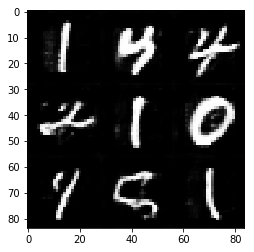

Epoch 2/2... Discriminator Loss: 1.2035... Generator Loss: 0.7714
Epoch 2/2... Discriminator Loss: 1.1939... Generator Loss: 0.6990
Epoch 2/2... Discriminator Loss: 1.4469... Generator Loss: 0.5658
Epoch 2/2... Discriminator Loss: 1.2228... Generator Loss: 0.6141
Epoch 2/2... Discriminator Loss: 1.3729... Generator Loss: 0.8024
Epoch 2/2... Discriminator Loss: 1.5145... Generator Loss: 0.4467
Epoch 2/2... Discriminator Loss: 1.4828... Generator Loss: 0.7666
Epoch 2/2... Discriminator Loss: 1.2415... Generator Loss: 0.6710
Epoch 2/2... Discriminator Loss: 1.2496... Generator Loss: 0.6936
Epoch 2/2... Discriminator Loss: 1.2631... Generator Loss: 0.5954


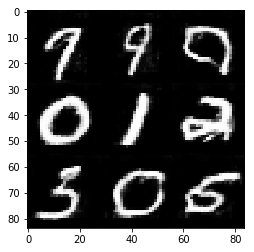

Epoch 2/2... Discriminator Loss: 1.3693... Generator Loss: 0.6520
Epoch 2/2... Discriminator Loss: 1.2261... Generator Loss: 0.6653
Epoch 2/2... Discriminator Loss: 1.4881... Generator Loss: 0.5777
Epoch 2/2... Discriminator Loss: 1.3044... Generator Loss: 0.6782
Epoch 2/2... Discriminator Loss: 1.2085... Generator Loss: 0.7514
Epoch 2/2... Discriminator Loss: 1.2968... Generator Loss: 0.7563
Epoch 2/2... Discriminator Loss: 1.2276... Generator Loss: 0.8858
Epoch 2/2... Discriminator Loss: 1.2404... Generator Loss: 0.7929
Epoch 2/2... Discriminator Loss: 1.3041... Generator Loss: 0.5730
Epoch 2/2... Discriminator Loss: 1.0989... Generator Loss: 0.7649


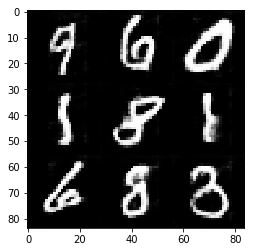

Epoch 2/2... Discriminator Loss: 1.2721... Generator Loss: 0.8745
Epoch 2/2... Discriminator Loss: 1.3933... Generator Loss: 0.7286
Epoch 2/2... Discriminator Loss: 1.5783... Generator Loss: 0.4058
Epoch 2/2... Discriminator Loss: 1.3339... Generator Loss: 0.6616
Epoch 2/2... Discriminator Loss: 1.3143... Generator Loss: 0.6459
Epoch 2/2... Discriminator Loss: 1.3770... Generator Loss: 0.7646
Epoch 2/2... Discriminator Loss: 1.2353... Generator Loss: 0.6121
Epoch 2/2... Discriminator Loss: 1.3970... Generator Loss: 0.7950
Epoch 2/2... Discriminator Loss: 1.0044... Generator Loss: 0.8062
Epoch 2/2... Discriminator Loss: 1.4395... Generator Loss: 0.4516


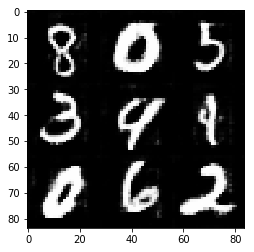

Epoch 2/2... Discriminator Loss: 1.3054... Generator Loss: 0.5539
Epoch 2/2... Discriminator Loss: 1.4016... Generator Loss: 0.4952
Epoch 2/2... Discriminator Loss: 1.1084... Generator Loss: 0.8021
Epoch 2/2... Discriminator Loss: 1.1630... Generator Loss: 0.7733
Epoch 2/2... Discriminator Loss: 1.4432... Generator Loss: 0.5416
Epoch 2/2... Discriminator Loss: 1.3012... Generator Loss: 0.7492
Epoch 2/2... Discriminator Loss: 1.2552... Generator Loss: 0.9036
Epoch 2/2... Discriminator Loss: 1.1911... Generator Loss: 0.6352
Epoch 2/2... Discriminator Loss: 1.3950... Generator Loss: 0.5270
Epoch 2/2... Discriminator Loss: 1.4557... Generator Loss: 0.4574


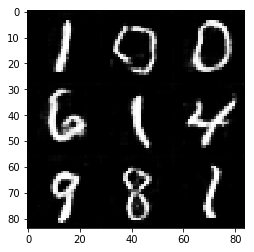

Epoch 2/2... Discriminator Loss: 1.3501... Generator Loss: 0.7071
Epoch 2/2... Discriminator Loss: 1.3737... Generator Loss: 0.7492
Epoch 2/2... Discriminator Loss: 1.4885... Generator Loss: 0.7427
Epoch 2/2... Discriminator Loss: 1.1651... Generator Loss: 0.7802
Epoch 2/2... Discriminator Loss: 1.5839... Generator Loss: 0.5993


In [301]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.3303... Generator Loss: 0.0990
Epoch 1/1... Discriminator Loss: 0.7452... Generator Loss: 1.7756
Epoch 1/1... Discriminator Loss: 1.6404... Generator Loss: 0.5384
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 1.2086... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.2080... Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.7072
Epoch 1/1... Discriminator Loss: 1.5337... Generator Loss: 0.7690
Epoch 1/1... Discriminator Loss: 1.6577... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 1.5914... Generator Loss: 0.5737


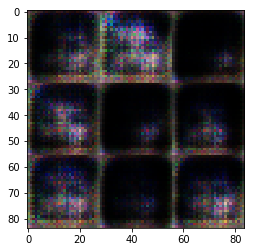

Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 1.0794
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.7315... Generator Loss: 1.2626
Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.2740... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.5435... Generator Loss: 0.5284
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.5743... Generator Loss: 0.6277


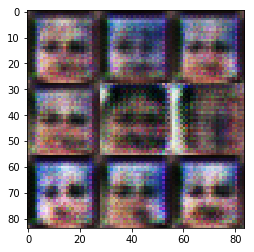

Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.3600... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.1473... Generator Loss: 0.8778
Epoch 1/1... Discriminator Loss: 0.8307... Generator Loss: 1.0297
Epoch 1/1... Discriminator Loss: 1.2411... Generator Loss: 0.8342
Epoch 1/1... Discriminator Loss: 1.5312... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.6314
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.5692... Generator Loss: 0.6100


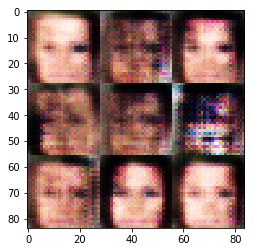

Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.7020
Epoch 1/1... Discriminator Loss: 1.5165... Generator Loss: 0.5368
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 0.8669
Epoch 1/1... Discriminator Loss: 1.4763... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.6416
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 0.7095
Epoch 1/1... Discriminator Loss: 1.7536... Generator Loss: 0.5572
Epoch 1/1... Discriminator Loss: 1.2916... Generator Loss: 0.6795


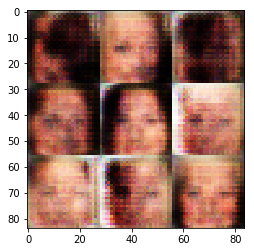

Epoch 1/1... Discriminator Loss: 1.1909... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.5740... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.5598... Generator Loss: 0.4595
Epoch 1/1... Discriminator Loss: 1.3162... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.2030... Generator Loss: 0.8684
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.6199... Generator Loss: 0.5006
Epoch 1/1... Discriminator Loss: 1.5646... Generator Loss: 0.6138
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.6945


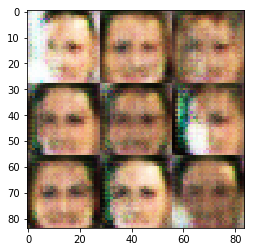

Epoch 1/1... Discriminator Loss: 1.5844... Generator Loss: 0.5161
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 0.7985
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.5600
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.8707
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.7645
Epoch 1/1... Discriminator Loss: 1.2165... Generator Loss: 0.9582
Epoch 1/1... Discriminator Loss: 1.4722... Generator Loss: 0.9683
Epoch 1/1... Discriminator Loss: 1.2639... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.5064... Generator Loss: 0.6125
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.8193


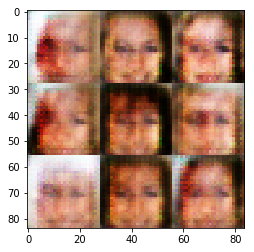

Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 1.6010... Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.7167
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.7253
Epoch 1/1... Discriminator Loss: 1.4987... Generator Loss: 0.5767
Epoch 1/1... Discriminator Loss: 1.3020... Generator Loss: 0.9781
Epoch 1/1... Discriminator Loss: 1.2646... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.8604
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.8705


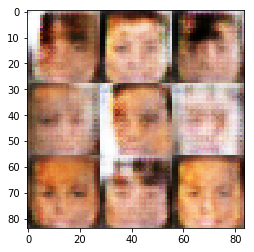

Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.8937
Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.7763
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.5810
Epoch 1/1... Discriminator Loss: 1.2248... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.7018
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.9847
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 1.0077
Epoch 1/1... Discriminator Loss: 1.4586... Generator Loss: 0.5606


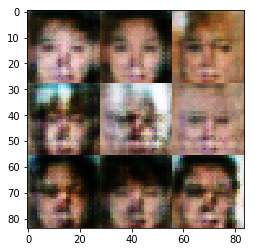

Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.5589
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 1.1537
Epoch 1/1... Discriminator Loss: 1.5375... Generator Loss: 0.5309
Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.5788
Epoch 1/1... Discriminator Loss: 1.5584... Generator Loss: 0.5967
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 0.7526
Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.7812
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.4095... Generator Loss: 0.8098
Epoch 1/1... Discriminator Loss: 1.5617... Generator Loss: 0.5434


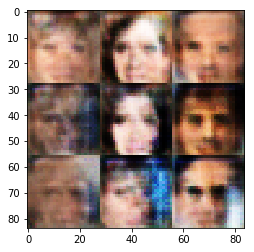

Epoch 1/1... Discriminator Loss: 1.2153... Generator Loss: 0.8246
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.9580
Epoch 1/1... Discriminator Loss: 1.2859... Generator Loss: 0.6283
Epoch 1/1... Discriminator Loss: 1.2658... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 0.5676
Epoch 1/1... Discriminator Loss: 1.5624... Generator Loss: 0.6055
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.6970
Epoch 1/1... Discriminator Loss: 1.4138... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.9434


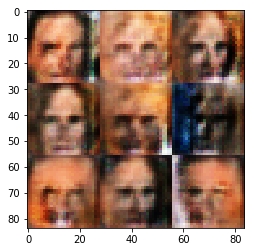

Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.7207
Epoch 1/1... Discriminator Loss: 1.1663... Generator Loss: 0.8808
Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 1.0194
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.2917... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.6128
Epoch 1/1... Discriminator Loss: 1.2378... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 0.5481


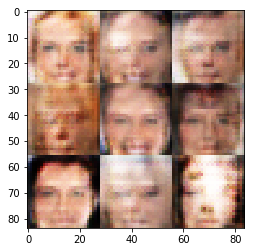

Epoch 1/1... Discriminator Loss: 1.2114... Generator Loss: 0.7354
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.5774
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.6020
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.5339
Epoch 1/1... Discriminator Loss: 1.2212... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 1.4155... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.6635


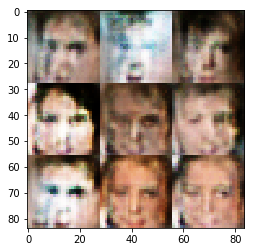

Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.6205
Epoch 1/1... Discriminator Loss: 1.2269... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.5599... Generator Loss: 0.5534
Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.8287
Epoch 1/1... Discriminator Loss: 1.3865... Generator Loss: 0.7477


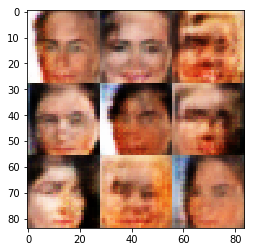

Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 0.6981
Epoch 1/1... Discriminator Loss: 1.4299... Generator Loss: 0.5441
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.6961
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.6867
Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.5089
Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 0.8336
Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 0.9978
Epoch 1/1... Discriminator Loss: 1.4729... Generator Loss: 0.6159


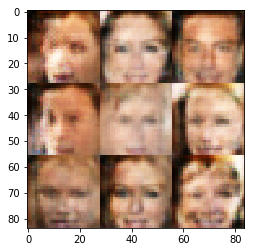

Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.7702
Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.4936
Epoch 1/1... Discriminator Loss: 1.6149... Generator Loss: 0.5290
Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.7377
Epoch 1/1... Discriminator Loss: 1.3277... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.7298


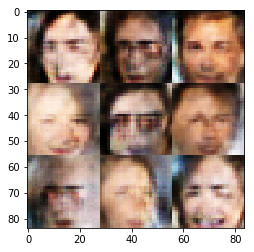

Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.5817
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.6937
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.5015... Generator Loss: 0.7459
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.8311
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.7231
Epoch 1/1... Discriminator Loss: 1.4412... Generator Loss: 0.7182
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.5290


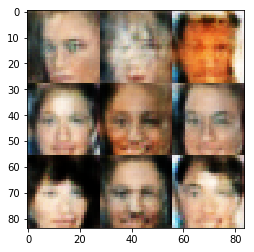

Epoch 1/1... Discriminator Loss: 1.2133... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.6271
Epoch 1/1... Discriminator Loss: 1.2696... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.5585
Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 1.3177... Generator Loss: 0.7304
Epoch 1/1... Discriminator Loss: 1.3524... Generator Loss: 0.6943


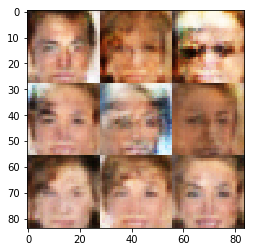

Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.4761... Generator Loss: 0.7375
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.7190
Epoch 1/1... Discriminator Loss: 1.4511... Generator Loss: 0.5652
Epoch 1/1... Discriminator Loss: 1.3057... Generator Loss: 0.7095
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.7500
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.5611
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.7007


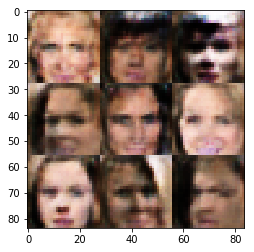

Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 1.3131... Generator Loss: 0.5224
Epoch 1/1... Discriminator Loss: 1.3170... Generator Loss: 0.5995
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.4398... Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.4519... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.6550
Epoch 1/1... Discriminator Loss: 1.2772... Generator Loss: 0.6533


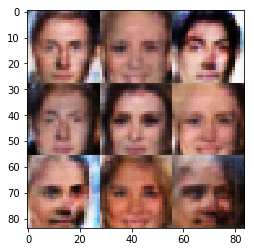

Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.6613
Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.6256
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 1.2881... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.2686... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.4913... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.6695


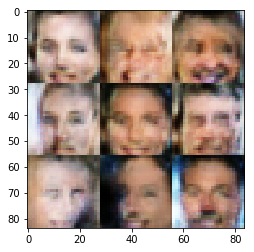

Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.2480... Generator Loss: 0.7493
Epoch 1/1... Discriminator Loss: 1.5438... Generator Loss: 0.4959
Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 1.2831... Generator Loss: 0.7630


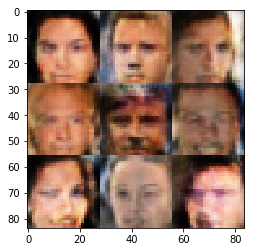

Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.3187... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.3426... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.6318
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.2212... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.8241
Epoch 1/1... Discriminator Loss: 1.4367... Generator Loss: 0.6840


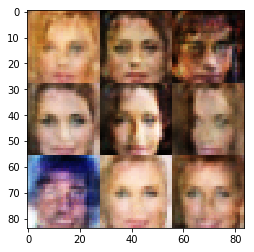

Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.5934
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.7783
Epoch 1/1... Discriminator Loss: 1.3189... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 0.7562
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.6112
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.8049
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.6979


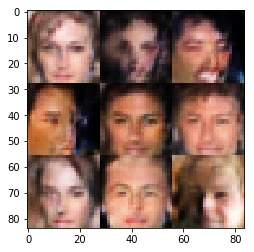

Epoch 1/1... Discriminator Loss: 1.4986... Generator Loss: 0.6361
Epoch 1/1... Discriminator Loss: 1.3568... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 0.6275
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.5703
Epoch 1/1... Discriminator Loss: 1.4859... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.7698
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.5911


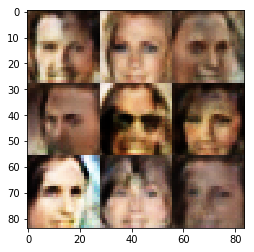

Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.7065
Epoch 1/1... Discriminator Loss: 1.2811... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.4693... Generator Loss: 0.5008
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.8507
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6148
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.7549


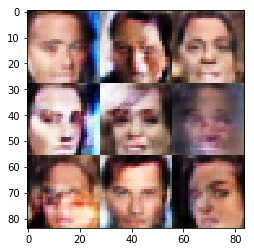

Epoch 1/1... Discriminator Loss: 1.4764... Generator Loss: 0.6223
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.5455
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.6872
Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 0.7417
Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 0.7345
Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.5418... Generator Loss: 0.5410
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.7242


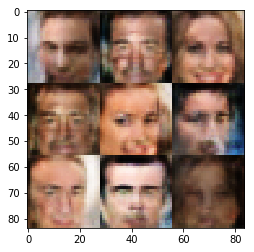

Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.7141
Epoch 1/1... Discriminator Loss: 1.2427... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.7766
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 0.7498
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.6211
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.4694... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 1.4992... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.2719... Generator Loss: 0.6654


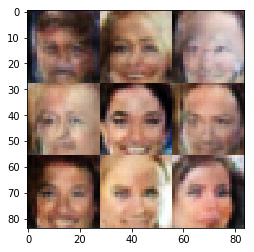

Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 0.6629
Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.6622
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.6074
Epoch 1/1... Discriminator Loss: 1.4118... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.6852
Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.7009
Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.2816... Generator Loss: 0.7595
Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.7772


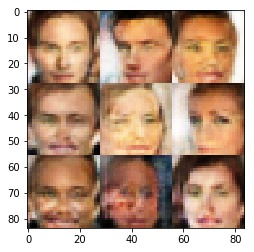

Epoch 1/1... Discriminator Loss: 1.2880... Generator Loss: 0.8949
Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.5908
Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.3633... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.7281
Epoch 1/1... Discriminator Loss: 1.2063... Generator Loss: 0.8548
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.7097


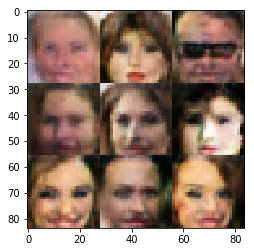

Epoch 1/1... Discriminator Loss: 1.1681... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 0.8129
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.6248
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.5809
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.7326


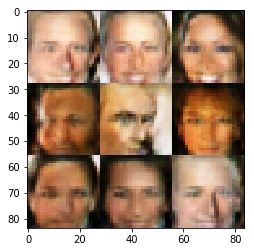

Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.2822... Generator Loss: 0.8451
Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.6704
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.5713
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.6546
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.8135
Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.6095
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.7222


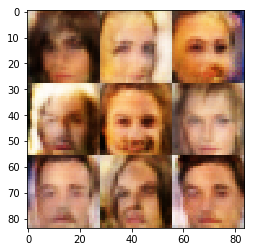

Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.7702
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.5126... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 0.6447
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.6997


In [299]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)